# **Predict the Customer Satisfaction - CSE 22**

#### **Dataset**
Below are the descriptions of the columns present in each dataset:

**User Information**

- `user_id` - A unique identifier for each user.
- `age` - The age of the user.
- `Gender` - The gender of the user (e.g., Male, Female, Other).
- `Date_Registered` - The date when the user registered.

**Loyalty Program Info**

- `Is_current_loyalty_program_member` - Whether the user is currently a member of the loyalty program (Yes/No).
- `loyalty_points_redeemed` - The number of loyalty points redeemed by the user.
- `loyalty_tier` - The loyalty tier of the user.
- `Received_tier_discount_percentage` - The percentage of discount the user received based on their loyalty tier.
- `Received_card_discount_percentage` - The percentage of discount the user received from using a loyalty card.
- `Received_coupon_discount_percentage` - The percentage of discount the user 
received from using a coupon.

**Product Information**

- `product_category` - The category of the purchased product (e.g., electronics, office supplies).
- `Product_value` - The displayed price of the product.
Transaction Details
- `transaction_id` - A unique identifier for each transaction.
- `order_id` - The unique identifier for the order that the transaction is part of.
- `payment_method` - The method of payment used for the transaction.
- `payment_datetime` - The date and time when the payment was made.
- `purchased_datetime` - The date and time when the product was purchased.
- `purchase_medium` - The medium used for the purchase.
- `final_payment` - The final amount paid by the user (after discounts and shipping cost).

**Delivery Information**

- `released_date` - The date when the product was released for shipment.
- `estimated_delivery_date` - The estimated delivery date for the product.
- `received_date` - The actual date when the product was received by the customer.
- `shipping_method` - The method used for shipping (e.g., Standard, Express).
- `tracking_number` - The tracking number assigned to the shipment.

**Target Variable**

- `customer_experience` - The target variable, representing the customer’s experience with the transaction. It can have the following values:
    - `good`
    - `neutral`
    - `bad`

In [121]:
# import nessesory libraries to preprosess the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
data=pd.read_csv('../artifacts/train_dataset.csv')
data.tail(15)

,id,user_id,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,...,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number,customer_experience
206954,206954,****262468,30,F,2024-12-17,YES,1,4.0,10.0,3.0,...,2024-12-28 23:31:44,2024-12-28 23:31:44,in-store,6963.44,2025-01-03,2025-01-06,2025-01-03,express,***9NDJLRCYBL,bad
206955,206955,****026537,45,O,2023-01-02,YES,2,3.0,7.0,NaN,...,2024-12-28 23:34:45,2024-12-28 23:34:45,in-store,8571.00,2024-12-29,2024-12-31,2024-12-29,express,***VBCNG6W7ZM,good
206956,206956,****246287,51,O,2024-11-26,YES,4,2.0,5.0,NaN,...,2024-12-28 23:35:28,2024-12-28 23:35:28,in-store,6633.00,2025-01-02,2025-01-09,2025-01-08,express,***N9PTGQDAP2,neutral
206957,206957,****285211,37,O,2024-12-15,NO,4,NaN,NaN,NaN,...,2024-12-28 23:42:09,2024-12-28 23:42:09,online,5169.00,2025-01-03,2025-01-06,2025-01-06,standard,***HKZD24MXON,good
206958,206958,****547539,38,M,2024-01-22,YES,0,1.0,3.0,NaN,...,2024-12-28 23:43:43,2024-12-28 23:43:43,in-store,1835.00,2025-01-01,2025-01-06,2025-01-06,express,***TVGAUSFUM4,neutral
206959,206959,****299815,29,O,2024-11-14,YES,0,4.0,10.0,NaN,...,2024-12-28 23:44:22,2024-12-28 23:44:22,in-store,9405.00,2025-01-04,2025-01-11,2025-01-13,standard,***YTKG4G5QBL,good
206960,206960,****829347,40,O,2024-12-27,NO,3,NaN,NaN,NaN,...,2024-12-28 23:46:40,2024-12-28 23:46:40,online,4589.00,2025-01-04,2025-01-10,2025-01-08,standard,***TDOON4INF7,bad
206961,206961,****358443,30,F,2024-12-24,NO,5,NaN,NaN,NaN,...,2024-12-28 23:48:10,2024-12-28 23:48:10,online,8943.00,2024-12-31,2025-01-02,2025-01-04,express,***NAJBGU3GZD,bad
206962,206962,****215998,28,O,2023-10-22,YES,1,4.0,10.0,4.0,...,2024-12-28 23:50:41,2024-12-28 23:50:41,in-store,5454.32,2024-12-31,2025-01-01,2024-12-29,express,***JX1UHMKH7L,bad
206963,206963,****938182,37,M,2024-12-27,YES,2,1.0,3.0,NaN,...,2024-12-28 23:50:42,2024-12-28 23:50:42,online,5926.00,2025-01-01,2025-01-04,2025-01-03,express,***K5DCZPZD2U,bad


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206969 entries, 0 to 206968
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   206969 non-null  int64  
 1   user_id                              206969 non-null  object 
 2   age                                  206969 non-null  int64  
 3   Gender                               206969 non-null  object 
 4   Date_Registered                      206969 non-null  object 
 5   Is_current_loyalty_program_member    206969 non-null  object 
 6   loyalty_points_redeemed              206969 non-null  int64  
 7   loyalty_tier                         104902 non-null  float64
 8   Received_tier_discount_percentage    103590 non-null  float64
 9   Received_card_discount_percentage    50090 non-null   float64
 10  Received_coupon_discount_percentage  206969 non-null  int64  
 11  product_categ

#### **Data Preprocessing**

In [124]:
# Check if any 0 values exist in the 'loyalty_tier' column
has_zero = (data['loyalty_tier'] == 0).any()

# Print the result
print("Does the 'loyalty_tier' column contain any 0 values?", has_zero)

Does the 'loyalty_tier' column contain any 0 values? False


In [125]:
# check the null values in the data
data.isnull().sum()

id                                          0
user_id                                     0
age                                         0
Gender                                      0
Date_Registered                             0
Is_current_loyalty_program_member           0
loyalty_points_redeemed                     0
loyalty_tier                           102067
Received_tier_discount_percentage      103379
Received_card_discount_percentage      156879
Received_coupon_discount_percentage         0
product_category                            0
Product_value                               0
transaction_id                              0
order_id                                    0
payment_method                              0
payment_datetime                            0
purchased_datetime                          0
purchase_medium                             0
final_payment                               0
released_date                               0
estimated_delivery_date           

In [126]:
# check there is any duplicated values
data.duplicated().sum()

np.int64(0)

In [127]:
# check there is any garbage values in the data in all columns

for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts())
    print("===="*10)

user_id
****256449    5
****445049    4
****432379    4
****586498    4
****408572    4
             ..
****936687    1
****654328    1
****660623    1
****286566    1
****494191    1
Name: count, Length: 186931, dtype: int64
Gender
F    69363
O    68858
M    68748
Name: count, dtype: int64
Date_Registered
2021-09-18    174
2021-03-23    156
2023-08-06    155
2021-10-27    151
2020-10-24    151
             ... 
2022-06-09     80
2022-03-25     79
2023-03-17     79
2023-11-01     79
2023-02-03     74
Name: count, Length: 1823, dtype: int64
Is_current_loyalty_program_member
YES    103590
NO     103379
Name: count, dtype: int64
product_category
office supplies    10577
clothing           10505
video games        10479
furniture          10446
health             10432
music              10431
sports             10363
garden             10358
movies             10354
automotive         10353
home               10334
books              10328
pet supplies       10306
tools              10286

In [128]:
# anlysis the data
data.describe()

,id,age,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment
count,206969.000000,206969.000000,206969.000000,104902.000000,103590.000000,50090.000000,206969.000000,206969.000000,206969.000000
mean,103484.000000,38.624668,2.472481,2.459762,6.243875,10.780775,4.147244,5322.859462,5142.777076
std,59746.948269,12.800575,1.718771,1.127135,2.582244,33.524402,18.867409,4304.731507,2847.272560
min,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,50.000000,101.000000
25%,51742.000000,28.000000,1.000000,1.000000,5.000000,2.000000,1.000000,2563.000000,2680.000000
50%,103484.000000,39.000000,2.000000,2.000000,5.000000,3.000000,3.000000,5080.000000,5134.000000
75%,155226.000000,50.000000,4.000000,3.000000,7.000000,4.000000,4.000000,7592.000000,7591.000000
max,206968.000000,60.000000,5.000000,4.000000,10.000000,199.000000,299.000000,49992.000000,10298.000000


In [129]:
data_test=pd.read_csv('../artifacts/test_dataset.csv')
# print(len(data_test[data_test['final_payment'] < 200]))


In [130]:
# age min =0 which is not possible
# max card discount percentage is 199 not possible
# max coupon discount percentage is 299 not possible

# Filter records where age is 0
filtered_data = data[data['age'] !=0 ]

# Filter records where card_discount_percentage is less than or equal to 100
filtered_data = filtered_data[
    (filtered_data['Received_card_discount_percentage'] < 100) | 
    (filtered_data['Received_card_discount_percentage'].isna())
]

# Filter records where coupon_discount_percentage is less than or equal to 100
filtered_data = filtered_data[
    (filtered_data['Received_coupon_discount_percentage'] < 100) | 
    (filtered_data['Received_coupon_discount_percentage'].isna())
]


filtered_data.describe()



,id,age,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment
count,202667.000000,202667.000000,202667.000000,101449.000000,101449.000000,47063.000000,202667.000000,202667.000000,202667.000000
mean,103454.800155,38.998115,2.504907,2.497688,6.243945,2.999851,2.499356,5033.605836,5142.361533
std,59780.264496,12.407997,1.706783,1.116489,2.581994,1.413605,1.708983,2876.661435,2848.098272
min,0.000000,18.000000,0.000000,1.000000,3.000000,1.000000,0.000000,50.000000,101.000000
25%,51661.000000,28.000000,1.000000,2.000000,5.000000,2.000000,1.000000,2541.000000,2679.000000
50%,103418.000000,39.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5034.000000,5134.000000
75%,155253.500000,50.000000,4.000000,3.000000,7.000000,4.000000,4.000000,7529.000000,7591.000000
max,206968.000000,60.000000,5.000000,4.000000,10.000000,5.000000,5.000000,9999.000000,10298.000000


In [131]:
filtered_data.describe(include='object')

,user_id,Gender,Date_Registered,Is_current_loyalty_program_member,product_category,transaction_id,order_id,payment_method,payment_datetime,purchased_datetime,purchase_medium,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number,customer_experience
count,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667
unique,183457,3,1823,2,20,202446,183683,13,202391,202391,2,1811,1819,1815,2,202655,3
top,****192912,F,2021-09-18,YES,office supplies,***73896060,***867750,amex,2022-05-23 09:42:22,2022-05-23 09:42:22,in-store,2024-12-29,2025-01-01,2024-12-31,standard,***NKA7QUEPVZ,good
freq,4,67927,170,101449,10349,2,5,15787,2,2,101337,714,679,652,101562,2,87086


In [132]:
%pip install seaborn

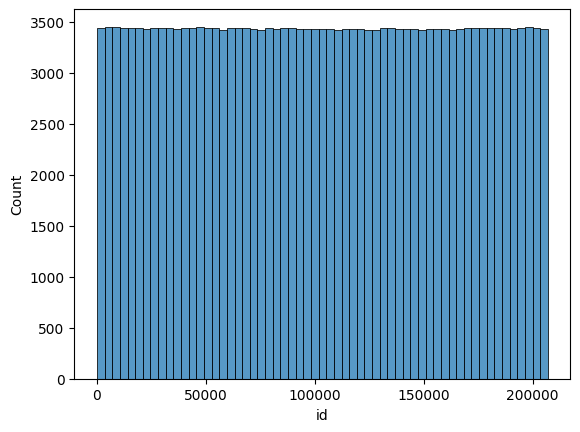

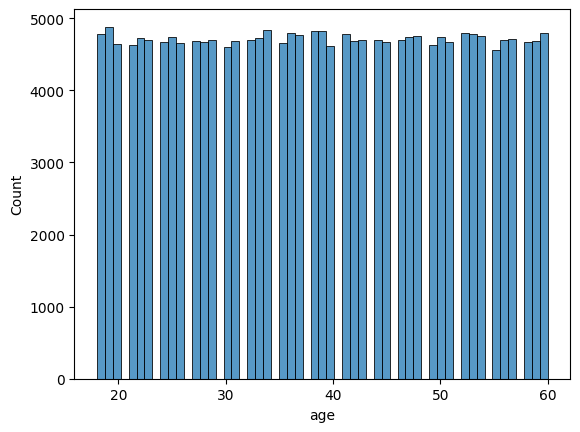

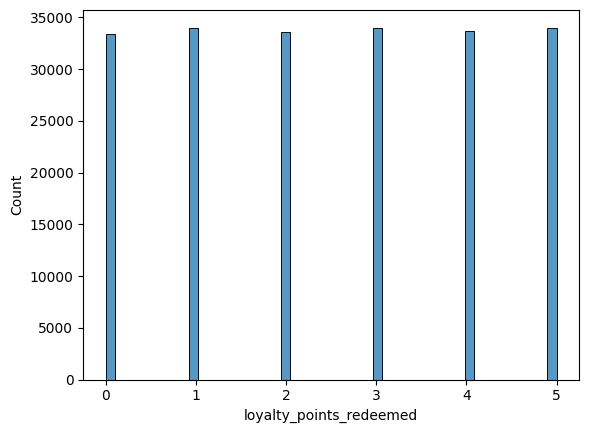

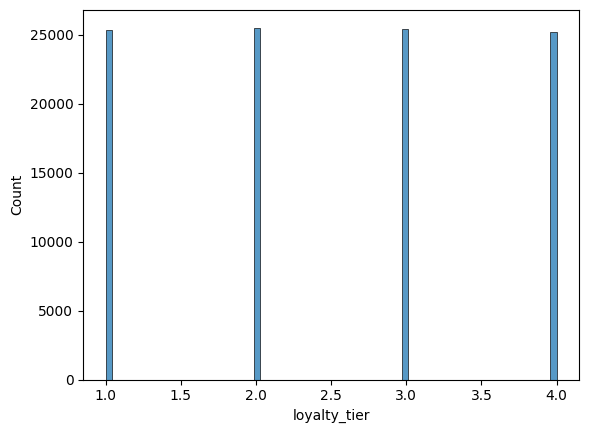

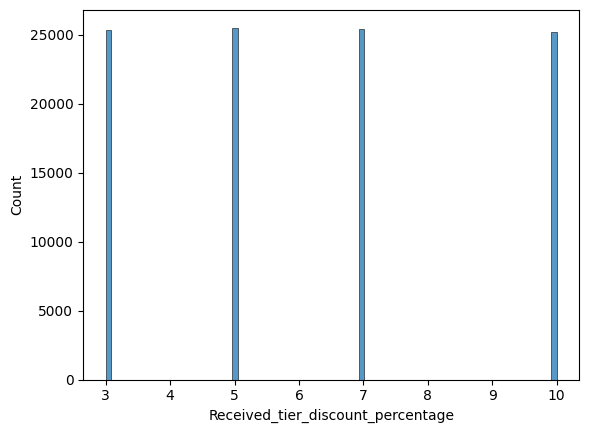

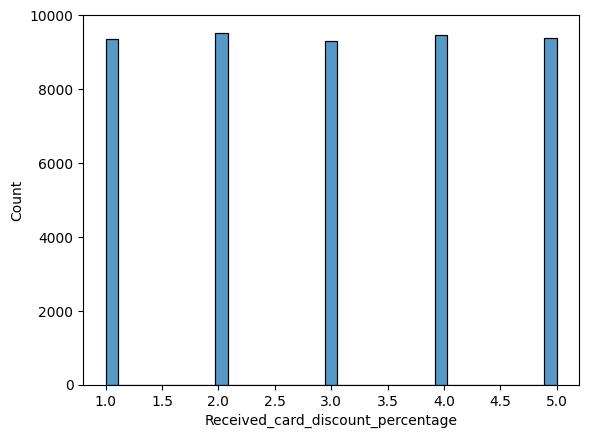

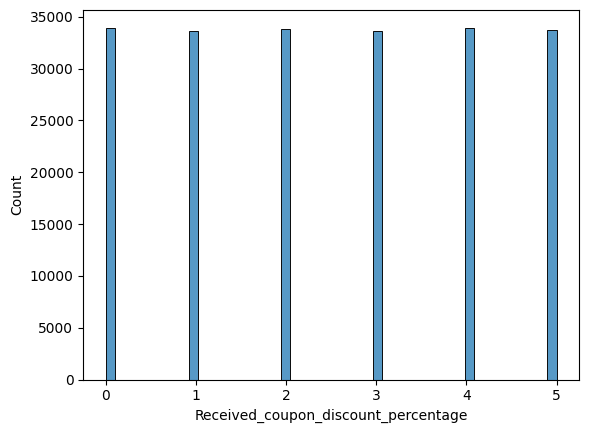

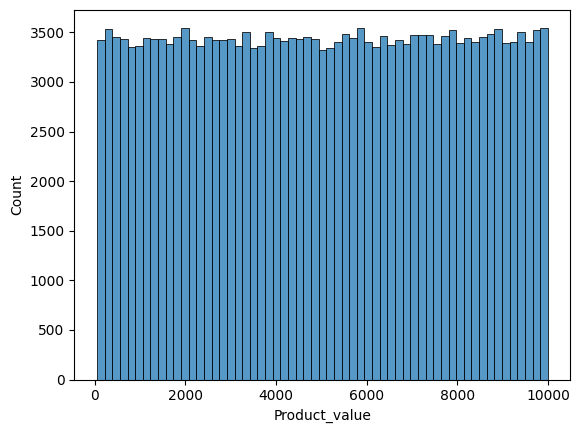

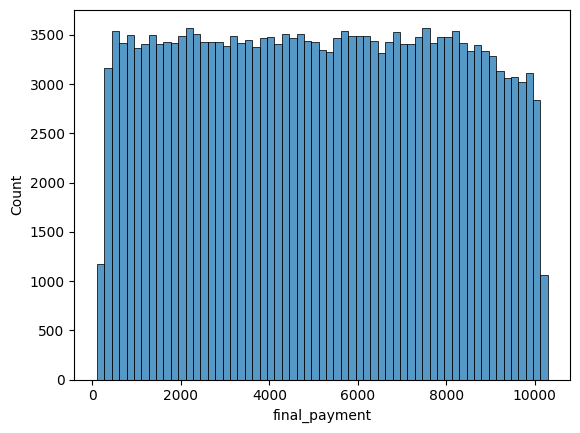

In [133]:
# histogram to  understand the data 

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


for column in filtered_data.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(data=filtered_data, x=column)
    plt.show()

In [134]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [135]:
# Slipt the data into train and test data
from sklearn.model_selection import train_test_split

X = filtered_data.drop(labels=['customer_experience'], axis=1)
y = filtered_data['customer_experience']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


#### **Manage Dataset**

In [136]:
filtered_data.head(5)

,id,user_id,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,...,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number,customer_experience
0,0,****589084,44,O,2020-01-01,NO,5,NaN,NaN,3.0,...,2020-01-05 22:27:16,2020-01-05 22:27:16,online,1293.00,2020-01-12,2020-01-17,2020-01-17,standard,***9AWDD64SYI,neutral
1,1,****494191,36,O,2020-01-04,YES,4,1.0,3.0,4.0,...,2020-01-06 00:37:51,2020-01-06 00:37:51,in-store,4522.44,2020-01-07,2020-01-12,2020-01-09,express,***3SSRORRZ0X,bad
2,2,****216469,40,F,2020-01-02,NO,3,NaN,NaN,3.0,...,2020-01-07 03:02:35,2020-01-07 03:02:35,online,5628.00,2020-01-12,2020-01-18,2020-01-18,express,***2VSB7MH7FN,good
3,3,****707170,33,M,2020-01-06,YES,1,1.0,3.0,2.0,...,2020-01-09 22:05:39,2020-01-09 22:05:39,in-store,2073.32,2020-01-13,2020-01-15,2020-01-17,express,***9XENHE2PKZ,bad
4,4,****066329,43,O,2020-01-06,YES,1,1.0,3.0,4.0,...,2020-01-11 08:32:22,2020-01-11 08:32:22,online,310.86,2020-01-15,2020-01-22,2020-01-20,express,***QTWLMEL0PE,bad


In [137]:
# one hot encoding for age column

X['gender_male'] =X['Gender'].apply(lambda x:1 if 'M' in x else 0)
X['gender_female'] =X['Gender'].apply(lambda x:1 if 'F' in x else 0)
X['gender_other'] =X['Gender'].apply(lambda x:1 if 'O' in x else 0)

In [138]:
# Is_current_loyalty_program_member

X['Is_current_loyalty_program_member_yes'] =X['Is_current_loyalty_program_member'].apply(lambda x:1 if 'YES' in x else 0)
#X_train['Is_current_loyalty_program_member_no'] =X_train['Is_current_loyalty_program_member'].apply(lambda x:1 if 'NO' in x else 0)

In [139]:
# shipping_method

X['shipping_method_express'] =X['shipping_method'].apply(lambda x:1 if 'express' in x else 0)
#X_train['shipping_method_standard'] =X_train['shipping_method'].apply(lambda x:1 if 'standard' in x else 0)

In [140]:
X=X.drop(labels=['Gender','Is_current_loyalty_program_member','shipping_method'], axis=1)

X.head(5)

,id,user_id,age,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,...,final_payment,released_date,estimated_delivery_date,received_date,tracking_number,gender_male,gender_female,gender_other,Is_current_loyalty_program_member_yes,shipping_method_express
0,0,****589084,44,2020-01-01,5,NaN,NaN,3.0,3,office supplies,...,1293.00,2020-01-12,2020-01-17,2020-01-17,***9AWDD64SYI,0,0,1,0,0
1,1,****494191,36,2020-01-04,4,1.0,3.0,4.0,1,electronics,...,4522.44,2020-01-07,2020-01-12,2020-01-09,***3SSRORRZ0X,0,0,1,1,1
2,2,****216469,40,2020-01-02,3,NaN,NaN,3.0,5,pet supplies,...,5628.00,2020-01-12,2020-01-18,2020-01-18,***2VSB7MH7FN,0,1,0,0,1
3,3,****707170,33,2020-01-06,1,1.0,3.0,2.0,3,clothing,...,2073.32,2020-01-13,2020-01-15,2020-01-17,***9XENHE2PKZ,1,0,0,1,1
4,4,****066329,43,2020-01-06,1,1.0,3.0,4.0,2,books,...,310.86,2020-01-15,2020-01-22,2020-01-20,***QTWLMEL0PE,0,0,1,1,1


In [141]:
data_test.describe()

,id,age,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment
count,137971.000000,137971.000000,137971.000000,68374.000000,68374.000000,31656.000000,137971.000000,137971.000000,137971.000000
mean,68985.000000,38.980170,2.495336,2.496958,6.242183,2.995325,2.496974,5019.697306,5128.644624
std,39828.941332,12.451722,1.704438,1.116520,2.581810,1.410694,1.706328,2877.282972,2848.483254
min,0.000000,18.000000,0.000000,1.000000,3.000000,1.000000,0.000000,50.000000,106.000000
25%,34492.500000,28.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2519.000000,2660.000000
50%,68985.000000,39.000000,2.000000,2.000000,5.000000,3.000000,2.000000,5029.000000,5129.000000
75%,103477.500000,50.000000,4.000000,3.000000,7.000000,4.000000,4.000000,7511.500000,7568.145000
max,137970.000000,60.000000,5.000000,4.000000,10.000000,5.000000,5.000000,9999.000000,10294.000000


In [142]:
# Define bins and labels
bins = [17, 25, 35, 45, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-60']

# Binning the ages
X['age_group'] = pd.cut(X['age'], bins=bins, labels=labels )

X['age_group_18-25'] =X['age_group'].apply(lambda x:1 if '18-25' in x else 0)
X['age_group_26-35'] =X['age_group'].apply(lambda x:1 if '26-35' in x else 0)
X['age_group_36-45'] =X['age_group'].apply(lambda x:1 if '36-45' in x else 0)
X['age_group_46-60'] =X['age_group'].apply(lambda x:1 if '46-60' in x else 0)

In [143]:
# Count occurrences of each user_id
user_counts = X['user_id'].value_counts()

# Map the counts back to the original DataFrame
X['user_count'] = X['user_id'].map(user_counts)

# Create binary columns for each category
X['1_time'] = (X['user_count'] == 1).astype(int)
X['2_times'] = (X['user_count'] == 2).astype(int)
X['3_times'] = (X['user_count'] == 3).astype(int)
X['4+_times'] = (X['user_count'] >= 4).astype(int)

In [144]:
X[X['user_count'] >= 4].head(5)

,id,user_id,age,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,...,age_group,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-60,user_count,1_time,2_times,3_times,4+_times
257,257,****256449,36,2020-02-11,4,NaN,NaN,NaN,1,toys,...,36-45,0,0,1,0,4,0,0,0,1
1590,1590,****997770,45,2020-08-04,4,1.0,3.0,NaN,5,furniture,...,36-45,0,0,1,0,4,0,0,0,1
1609,1609,****720431,45,2020-01-07,3,3.0,7.0,NaN,2,furniture,...,36-45,0,0,1,0,4,0,0,0,1
2558,2558,****173271,41,2020-04-27,2,4.0,10.0,NaN,5,movies,...,36-45,0,0,1,0,4,0,0,0,1
2653,2653,****395793,38,2020-08-14,5,2.0,5.0,NaN,2,appliances,...,36-45,0,0,1,0,4,0,0,0,1


In [145]:
X[X['age_group'].isna()].tail(10)


,id,user_id,age,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,...,age_group,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-60,user_count,1_time,2_times,3_times,4+_times


In [146]:
X=X.drop(labels=['age','age_group'], axis=1)

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,Product_value,...,shipping_method_express,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-60,user_count,1_time,2_times,3_times,4+_times
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,office supplies,1003,...,0,0,0,1,0,2,0,1,0,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,electronics,4707,...,1,0,0,1,0,1,1,0,0,0
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,pet supplies,5486,...,1,0,0,1,0,1,1,0,0,0
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,clothing,2121,...,1,0,1,0,0,1,1,0,0,0
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,books,246,...,1,0,0,1,0,1,1,0,0,0


In [147]:
# Define a mapping for broader categories
product_categories = {
    'office supplies': 'Home & Living',
    'clothing': 'Apparel & Beauty',
    'video games': 'Entertainment & Media',
    'furniture': 'Home & Living',
    'music': 'Entertainment & Media',
    'health': 'Health & Fitness',
    'sports': 'Health & Fitness',
    'home': 'Home & Living',
    'automotive': 'Electronics & Automotive',
    'garden': 'Home & Living',
    'books': 'Entertainment & Media',
    'movies': 'Entertainment & Media',
    'pet supplies': 'Home & Living',
    'tools': 'Home & Living',
    'electronics': 'Electronics & Automotive',
    'appliances': 'Home & Living',
    'toys': 'Entertainment & Media',
    'beauty': 'Apparel & Beauty',
    'jewelry': 'Apparel & Beauty',
    'groceries': 'Groceries'
}

# Add a new column for the broader category
X['product_category_group'] = X['product_category'].map(product_categories)




# View the categorized data
X['product_category_group'].value_counts()


product_category_group
Home & Living               71067
Entertainment & Media       50784
Apparel & Beauty            30361
Health & Fitness            20357
Electronics & Automotive    20189
Groceries                    9909
Name: count, dtype: int64

In [148]:
for category in ['Home & Living','Entertainment & Media','Apparel & Beauty','Health & Fitness','Electronics & Automotive','Groceries']:
    X[f'category_{category}'] = X['product_category_group'].apply(lambda x: 1 if category in x else 0)


In [149]:
X['product_category'].value_counts()

product_category
office supplies    10349
clothing           10304
video games        10280
furniture          10220
music              10217
health             10207
sports             10150
home               10134
automotive         10133
garden             10127
books              10124
movies             10113
pet supplies       10110
tools              10072
electronics        10056
appliances         10055
toys               10050
beauty             10045
jewelry            10012
groceries           9909
Name: count, dtype: int64

In [150]:

# Create one-hot encoded columns for product

for category in ['office supplies','music','video games','automotive','clothing','furniture','books','sports','health','movies','home','pet supplies','beauty','tools','appliances','toys','garden','electronics','jewelry','groceries']:
    X[f'product_category_{category}'] = X['product_category'].apply(lambda x: 1 if category in x else 0)


In [151]:
X=X.drop(labels=['product_category','product_category_group'], axis=1)

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,product_category_home,product_category_pet supplies,product_category_beauty,product_category_tools,product_category_appliances,product_category_toys,product_category_garden,product_category_electronics,product_category_jewelry,product_category_groceries
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0,0,0,0,0,0,0,0,0,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,0,0,0,0,0,1,0,0
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,0,1,0,0,0,0,0,0,0,0
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0,0,0,0,0,0,0,0,0,0
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# X=X.drop(labels=['shipping_method_standard','Is_current_loyalty_program_member_no'], axis=1)

# X.head(5)


In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202667 entries, 0 to 206968
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     202667 non-null  int64  
 1   user_id                                202667 non-null  object 
 2   Date_Registered                        202667 non-null  object 
 3   loyalty_points_redeemed                202667 non-null  int64  
 4   loyalty_tier                           101449 non-null  float64
 5   Received_tier_discount_percentage      101449 non-null  float64
 6   Received_card_discount_percentage      47063 non-null   float64
 7   Received_coupon_discount_percentage    202667 non-null  int64  
 8   Product_value                          202667 non-null  int64  
 9   transaction_id                         202667 non-null  object 
 10  order_id                               202667 non-null  objec

**Derived the features**

In [154]:
# Convert 'payment_datetime' and 'Date_Registered' to datetime objects if they are not already
X['payment_datetime'] = pd.to_datetime(X['payment_datetime'])
X['Date_Registered'] = pd.to_datetime(X['Date_Registered'])

# Calculate account age (difference in days between 'payment_datetime' and 'Date_Registered')
X['account_age'] = (X['payment_datetime'] - X['Date_Registered']).dt.days

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,product_category_pet supplies,product_category_beauty,product_category_tools,product_category_appliances,product_category_toys,product_category_garden,product_category_electronics,product_category_jewelry,product_category_groceries,account_age
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0,0,0,0,0,0,0,0,0,4
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,0,0,0,0,1,0,0,2
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,1,0,0,0,0,0,0,0,0,5
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0,0,0,0,0,0,0,0,0,3
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0,0,0,0,0,0,0,0,0,5


In [155]:
# product payment ratio

X['product_payment_ratio'] = (X['Product_value'] / X['final_payment'])

# points to value ratio

X['points_to_value_ratio'] = (X['loyalty_points_redeemed'] / X['Product_value'])

# payment - purches time

X['purchased_datetime'] = pd.to_datetime(X['purchased_datetime'])
X['payment_purches_time'] = (X['payment_datetime'] - X['purchased_datetime']).dt.total_seconds() / 3600

# Get today's date
today = pd.Timestamp.now()

# Calculate the day difference
X['days_difference'] = (today - X['purchased_datetime']).dt.days

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,product_category_toys,product_category_garden,product_category_electronics,product_category_jewelry,product_category_groceries,account_age,product_payment_ratio,points_to_value_ratio,payment_purches_time,days_difference
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0,0,0,0,0,4,0.775715,0.004985,0.0,1836
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,1,0,0,2,1.040810,0.000850,0.0,1836
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,0,0,0,0,0,5,0.974769,0.000547,0.0,1835
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0,0,0,0,0,3,1.022997,0.000471,0.0,1832
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0,0,0,0,0,5,0.791353,0.004065,0.0,1831


In [156]:
# Function to map dates to seasons
def assign_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the season function
X['season'] = X['purchased_datetime'].apply(assign_season)

for seasons in ['Winter','Spring','Summer','Autumn']:
    X[f'season_{seasons}'] = X['season'].apply(lambda x: 1 if seasons in x else 0)

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,account_age,product_payment_ratio,points_to_value_ratio,payment_purches_time,days_difference,season,season_Winter,season_Spring,season_Summer,season_Autumn
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,4,0.775715,0.004985,0.0,1836,Winter,1,0,0,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,2,1.040810,0.000850,0.0,1836,Winter,1,0,0,0
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,5,0.974769,0.000547,0.0,1835,Winter,1,0,0,0
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,3,1.022997,0.000471,0.0,1832,Winter,1,0,0,0
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,5,0.791353,0.004065,0.0,1831,Winter,1,0,0,0


In [157]:
# delivary time 

X['released_date'] = pd.to_datetime(X['released_date'])
X['received_date'] = pd.to_datetime(X['received_date'])
X['estimated_delivery_date'] = pd.to_datetime(X['estimated_delivery_date'])

# Calculate account age (difference in days between 'payment_datetime' and 'Date_Registered')
X['delivary_time'] = (X['received_date'] - X['released_date']).dt.days
X['delivary_delay'] = (X['received_date'] - X['estimated_delivery_date']).dt.days


In [158]:
# X=X.drop(labels=['is_delivery'], axis=1)

# Create the 'is_delivery' feature: 1 if delivery delay > 0, else 0
X['is_delivery_delay'] = (X['delivary_delay'] > 0).astype(int)

X.head(10)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,payment_purches_time,days_difference,season,season_Winter,season_Spring,season_Summer,season_Autumn,delivary_time,delivary_delay,is_delivery_delay
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0.0,1836,Winter,1,0,0,0,5,0,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0.0,1836,Winter,1,0,0,0,2,-3,0
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,0.0,1835,Winter,1,0,0,0,6,0,0
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0.0,1832,Winter,1,0,0,0,4,2,1
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0.0,1831,Winter,1,0,0,0,5,-2,0
5,5,****236570,2020-01-08,0,NaN,NaN,NaN,2,6060,***95485482,...,0.0,1830,Winter,1,0,0,0,2,1,1
6,6,****256225,2020-01-05,4,NaN,NaN,NaN,3,1896,***73403900,...,0.0,1830,Winter,1,0,0,0,1,-3,0
7,7,****476204,2020-01-10,1,2.0,5.0,NaN,5,2106,***15990020,...,0.0,1829,Winter,1,0,0,0,3,-1,0
8,8,****243946,2020-01-04,5,NaN,NaN,2.0,1,9383,***12175662,...,0.0,1827,Winter,1,0,0,0,6,1,1
9,9,****624680,2020-01-14,1,4.0,10.0,5.0,0,4847,***91761095,...,0.0,1827,Winter,1,0,0,0,2,-2,0


In [159]:
# Extract the day of the week (0 = Monday, ..., 6 = Sunday)
X['day_of_week'] = X['payment_datetime'].dt.dayofweek

# Add is_weekend column (1 for weekends, 0 for weekdays)
X['is_weekend'] = X['day_of_week'].isin([5, 6]).astype(int)

# Extract the hour of the transaction (0 = midnight, 23 = 11 PM)
X['transaction_hour'] = X['payment_datetime'].dt.hour

# Add transaction bucket columns
X['is_morning'] = ((X['transaction_hour'] >= 6) & (X['transaction_hour'] < 12)).astype(int)
X['is_afternoon'] = ((X['transaction_hour'] >= 12) & (X['transaction_hour'] < 18)).astype(int)
X['is_evening'] = ((X['transaction_hour'] >= 18) & (X['transaction_hour'] < 22)).astype(int)
X['is_night'] = ((X['transaction_hour'] >= 22) | (X['transaction_hour'] < 6)).astype(int)

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,delivary_time,delivary_delay,is_delivery_delay,day_of_week,is_weekend,transaction_hour,is_morning,is_afternoon,is_evening,is_night
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,5,0,0,6,1,22,0,0,0,1
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,2,-3,0,0,0,0,0,0,0,1
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,6,0,0,1,0,3,0,0,0,1
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,4,2,1,3,0,22,0,0,0,1
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,5,-2,0,5,1,8,1,0,0,0


In [160]:
# tier discount missing

X['tier_pressent'] = (X['loyalty_tier'] > 0).astype(int)

# card discount present

X['card_present'] = (X['Received_card_discount_percentage'] > 0).astype(int)

# coupon present
X['coupon_present'] = (X['Received_coupon_discount_percentage'] > 0).astype(int)


In [161]:
X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,day_of_week,is_weekend,transaction_hour,is_morning,is_afternoon,is_evening,is_night,tier_pressent,card_present,coupon_present
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,6,1,22,0,0,0,1,0,1,1
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,0,0,0,0,1,1,1,1
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,1,0,3,0,0,0,1,0,1,1
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,3,0,22,0,0,0,1,1,1,1
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,5,1,8,1,0,0,0,1,1,1


In [162]:
X.describe(include='object')

,user_id,transaction_id,order_id,payment_method,purchase_medium,tracking_number,season
count,202667,202667,202667,202667,202667,202667,202667
unique,183457,202446,183683,13,2,202655,4
top,****192912,***73896060,***867750,amex,in-store,***NKA7QUEPVZ,Autumn
freq,4,2,5,15787,101337,2,62263


In [163]:
X['payment_method'].value_counts()

payment_method
amex             15787
coinsph          15762
visa_d           15746
visa_c           15682
mastercard_c     15594
mastercard_d     15567
cash             15563
bank_transfer    15562
otc              15560
shopeepay        15524
grabpay          15455
gcash            15452
maya             15413
Name: count, dtype: int64

In [164]:
X['purchase_medium'].value_counts()

purchase_medium
in-store    101337
online      101330
Name: count, dtype: int64

In [165]:
for category in ['visa_c','amex','coinsph','visa_d','mastercard_c','bank_transfer','cash','mastercard_d','otc','shopeepay','grabpay','maya','gcash']:
    X[f'payment_{category}'] = X['payment_method'].apply(lambda x: 1 if category in x else 0)

X['purchase_medium_in-store'] = X['purchase_medium'].apply(lambda x: 1 if 'in-store' in x else 0)

In [166]:
# Define a mapping for categories
payment_categories = {
    'cash': 'payment_using_cash',
    'visa_d': 'cards_payments',
    'shopeepay': 'e_wallet',
    'gcash': 'e_wallet',
    'coinsph': 'e_wallet',
    'visa_c': 'cards_payments',
    'amex': 'cards_payments',
    'otc': 'over_the_counter',
    'mastercard_d': 'cards_payments',
    'grabpay': 'e_wallet',
    'mastercard_c': 'cards_payments',
    'bank_transfer': 'bank_transfer',
    'maya': 'e_wallet'
}

# Add a new column for the category
X['payment_category'] = X['payment_method'].map(payment_categories)



In [167]:
X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,payment_bank_transfer,payment_cash,payment_mastercard_d,payment_otc,payment_shopeepay,payment_grabpay,payment_maya,payment_gcash,purchase_medium_in-store,payment_category
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0,0,0,0,0,0,0,0,0,cards_payments
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,0,0,0,0,0,0,1,cards_payments
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,0,0,0,0,0,0,0,0,0,cards_payments
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0,0,0,0,0,0,0,0,1,cards_payments
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0,0,0,0,0,0,0,0,0,cards_payments


In [168]:
X['payment_category'].value_counts()

payment_category
cards_payments        78376
e_wallet              77606
payment_using_cash    15563
bank_transfer         15562
over_the_counter      15560
Name: count, dtype: int64

In [169]:
for category in ['cards_payments','e_wallet','payment_using_cash','bank_transfer','over_the_counter']:
    X[f'payment_category_{category}'] = X['payment_category'].apply(lambda x: 1 if category in x else 0)

X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,payment_grabpay,payment_maya,payment_gcash,purchase_medium_in-store,payment_category,payment_category_cards_payments,payment_category_e_wallet,payment_category_payment_using_cash,payment_category_bank_transfer,payment_category_over_the_counter
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0,0,0,0,cards_payments,1,0,0,0,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,0,1,cards_payments,1,0,0,0,0
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,0,0,0,0,cards_payments,1,0,0,0,0
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0,0,0,1,cards_payments,1,0,0,0,0
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0,0,0,0,cards_payments,1,0,0,0,0


In [170]:
filtered_data.describe(include='object')

,user_id,Gender,Date_Registered,Is_current_loyalty_program_member,product_category,transaction_id,order_id,payment_method,payment_datetime,purchased_datetime,purchase_medium,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number,customer_experience
count,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667,202667
unique,183457,3,1823,2,20,202446,183683,13,202391,202391,2,1811,1819,1815,2,202655,3
top,****192912,F,2021-09-18,YES,office supplies,***73896060,***867750,amex,2022-05-23 09:42:22,2022-05-23 09:42:22,in-store,2024-12-29,2025-01-01,2024-12-31,standard,***NKA7QUEPVZ,good
freq,4,67927,170,101449,10349,2,5,15787,2,2,101337,714,679,652,101562,2,87086


In [171]:
X['Product_value'].describe()

count    202667.000000
mean       5033.605836
std        2876.661435
min          50.000000
25%        2541.000000
50%        5034.000000
75%        7529.000000
max        9999.000000
Name: Product_value, dtype: float64

In [172]:
# Define the bins for the value ranges (adjust as needed)
bins = [49, 500, 1000, 5000, float('inf')]  # Define value ranges
labels = ['50-500', '500-1000', '1000-5000', '5000-10000']  # Labels for the bins

# Create a new column for product value category
X['product_value_category'] = pd.cut(X['Product_value'], bins=bins, labels=labels)

# Optional: Create binary columns for each subcategory
for label in labels:
    X[f'is_{label}'] = (X['product_value_category'] == label).astype(int)


In [173]:
X.head(5)

,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,payment_category_cards_payments,payment_category_e_wallet,payment_category_payment_using_cash,payment_category_bank_transfer,payment_category_over_the_counter,product_value_category,is_50-500,is_500-1000,is_1000-5000,is_5000-10000
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,1,0,0,0,0,1000-5000,0,0,1,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,1,0,0,0,0,1000-5000,0,0,1,0
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,1,0,0,0,0,5000-10000,0,0,0,1
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,1,0,0,0,0,1000-5000,0,0,1,0
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,1,0,0,0,0,50-500,1,0,0,0


In [174]:
X.columns.tolist()

['id',
 'user_id',
 'Date_Registered',
 'loyalty_points_redeemed',
 'loyalty_tier',
 'Received_tier_discount_percentage',
 'Received_card_discount_percentage',
 'Received_coupon_discount_percentage',
 'Product_value',
 'transaction_id',
 'order_id',
 'payment_method',
 'payment_datetime',
 'purchased_datetime',
 'purchase_medium',
 'final_payment',
 'released_date',
 'estimated_delivery_date',
 'received_date',
 'tracking_number',
 'gender_male',
 'gender_female',
 'gender_other',
 'Is_current_loyalty_program_member_yes',
 'shipping_method_express',
 'age_group_18-25',
 'age_group_26-35',
 'age_group_36-45',
 'age_group_46-60',
 'user_count',
 '1_time',
 '2_times',
 '3_times',
 '4+_times',
 'category_Home & Living',
 'category_Entertainment & Media',
 'category_Apparel & Beauty',
 'category_Health & Fitness',
 'category_Electronics & Automotive',
 'category_Groceries',
 'product_category_office supplies',
 'product_category_music',
 'product_category_video games',
 'product_category_au

In [175]:
# Add 'is_speed' column
X['not_delivary_delay'] = (X['is_delivery_delay'] == 0).astype(int)
X['is_speed'] = ((X['delivary_time'] <= 2).astype(int)) * X['not_delivary_delay']

X.head(5)


,id,user_id,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,transaction_id,...,payment_category_payment_using_cash,payment_category_bank_transfer,payment_category_over_the_counter,product_value_category,is_50-500,is_500-1000,is_1000-5000,is_5000-10000,not_delivary_delay,is_speed
0,0,****589084,2020-01-01,5,NaN,NaN,3.0,3,1003,***95994394,...,0,0,0,1000-5000,0,0,1,0,1,0
1,1,****494191,2020-01-04,4,1.0,3.0,4.0,1,4707,***68432956,...,0,0,0,1000-5000,0,0,1,0,1,1
2,2,****216469,2020-01-02,3,NaN,NaN,3.0,5,5486,***66429391,...,0,0,0,5000-10000,0,0,0,1,1,0
3,3,****707170,2020-01-06,1,1.0,3.0,2.0,3,2121,***64300568,...,0,0,0,1000-5000,0,0,1,0,0,0
4,4,****066329,2020-01-06,1,1.0,3.0,4.0,2,246,***54106959,...,0,0,0,50-500,1,0,0,0,1,0


In [176]:
X[['is_delivery_delay','is_speed','not_delivary_delay']].tail()

,is_delivery_delay,is_speed,not_delivary_delay
206964,0,1,1
206965,1,0,0
206966,0,0,1
206967,1,0,0
206968,0,1,1


In [177]:
X=X.drop(labels=['id','not_delivary_delay','user_id','Date_Registered','transaction_id','order_id','payment_method','payment_datetime','purchased_datetime','purchase_medium','released_date','estimated_delivery_date','received_date','tracking_number'], axis=1)

In [178]:
X.head(5)

,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment,gender_male,gender_female,gender_other,...,payment_category_e_wallet,payment_category_payment_using_cash,payment_category_bank_transfer,payment_category_over_the_counter,product_value_category,is_50-500,is_500-1000,is_1000-5000,is_5000-10000,is_speed
0,5,NaN,NaN,3.0,3,1003,1293.00,0,0,1,...,0,0,0,0,1000-5000,0,0,1,0,0
1,4,1.0,3.0,4.0,1,4707,4522.44,0,0,1,...,0,0,0,0,1000-5000,0,0,1,0,1
2,3,NaN,NaN,3.0,5,5486,5628.00,0,1,0,...,0,0,0,0,5000-10000,0,0,0,1,0
3,1,1.0,3.0,2.0,3,2121,2073.32,1,0,0,...,0,0,0,0,1000-5000,0,0,1,0,0
4,1,1.0,3.0,4.0,2,246,310.86,0,0,1,...,0,0,0,0,50-500,1,0,0,0,0


In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202667 entries, 0 to 206968
Data columns (total 96 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   loyalty_points_redeemed                202667 non-null  int64   
 1   loyalty_tier                           101449 non-null  float64 
 2   Received_tier_discount_percentage      101449 non-null  float64 
 3   Received_card_discount_percentage      47063 non-null   float64 
 4   Received_coupon_discount_percentage    202667 non-null  int64   
 5   Product_value                          202667 non-null  int64   
 6   final_payment                          202667 non-null  float64 
 7   gender_male                            202667 non-null  int64   
 8   gender_female                          202667 non-null  int64   
 9   gender_other                           202667 non-null  int64   
 10  Is_current_loyalty_program_member_yes  202667 non

In [180]:
X.describe(include='object')

,season,payment_category
count,202667,202667
unique,4,5
top,Autumn,cards_payments
freq,62263,78376


In [181]:
X=X.drop(labels=['season','payment_category'], axis=1)


In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202667 entries, 0 to 206968
Data columns (total 94 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   loyalty_points_redeemed                202667 non-null  int64   
 1   loyalty_tier                           101449 non-null  float64 
 2   Received_tier_discount_percentage      101449 non-null  float64 
 3   Received_card_discount_percentage      47063 non-null   float64 
 4   Received_coupon_discount_percentage    202667 non-null  int64   
 5   Product_value                          202667 non-null  int64   
 6   final_payment                          202667 non-null  float64 
 7   gender_male                            202667 non-null  int64   
 8   gender_female                          202667 non-null  int64   
 9   gender_other                           202667 non-null  int64   
 10  Is_current_loyalty_program_member_yes  202667 non

In [183]:
temp=filtered_data[filtered_data['age'].isna()]


**Fill missing Data**

In [184]:
temp.head(10)

,id,user_id,age,Gender,Date_Registered,Is_current_loyalty_program_member,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,...,payment_datetime,purchased_datetime,purchase_medium,final_payment,released_date,estimated_delivery_date,received_date,shipping_method,tracking_number,customer_experience


In [185]:
X.head(5)
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 202667 entries, 0 to 206968
Data columns (total 94 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   loyalty_points_redeemed                202667 non-null  int64   
 1   loyalty_tier                           101449 non-null  float64 
 2   Received_tier_discount_percentage      101449 non-null  float64 
 3   Received_card_discount_percentage      47063 non-null   float64 
 4   Received_coupon_discount_percentage    202667 non-null  int64   
 5   Product_value                          202667 non-null  int64   
 6   final_payment                          202667 non-null  float64 
 7   gender_male                            202667 non-null  int64   
 8   gender_female                          202667 non-null  int64   
 9   gender_other                           202667 non-null  int64   
 10  Is_current_loyalty_program_member_yes  202667 non

In [186]:
X=X.drop(labels=['product_value_category'] , axis=1)

**By analysing data set only master_c,visa_c and amex gets discount other all 0 because, no one get discout with othwe cards and  all current_loyalty_program_member get tier discounts**

In [187]:

# X['Received_card_discount_percentage'] = X['Received_card_discount_percentage'].fillna(X['Received_card_discount_percentage'].mean())

# Fill other columns with 0
X_1 = X.fillna(value=0)

In [188]:
X_1.head(5)

,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment,gender_male,gender_female,gender_other,...,payment_category_cards_payments,payment_category_e_wallet,payment_category_payment_using_cash,payment_category_bank_transfer,payment_category_over_the_counter,is_50-500,is_500-1000,is_1000-5000,is_5000-10000,is_speed
0,5,0.0,0.0,3.0,3,1003,1293.00,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,4,1.0,3.0,4.0,1,4707,4522.44,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,3,0.0,0.0,3.0,5,5486,5628.00,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,1,1.0,3.0,2.0,3,2121,2073.32,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,1.0,3.0,4.0,2,246,310.86,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [189]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202667 entries, 0 to 206968
Data columns (total 93 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   loyalty_points_redeemed                202667 non-null  int64  
 1   loyalty_tier                           202667 non-null  float64
 2   Received_tier_discount_percentage      202667 non-null  float64
 3   Received_card_discount_percentage      202667 non-null  float64
 4   Received_coupon_discount_percentage    202667 non-null  int64  
 5   Product_value                          202667 non-null  int64  
 6   final_payment                          202667 non-null  float64
 7   gender_male                            202667 non-null  int64  
 8   gender_female                          202667 non-null  int64  
 9   gender_other                           202667 non-null  int64  
 10  Is_current_loyalty_program_member_yes  202667 non-null  int64

In [190]:
X_1['total_discount'] = X_1['Received_card_discount_percentage'] + X_1['Received_tier_discount_percentage'] + X_1['Received_coupon_discount_percentage']
X_1['is_discounted'] = (X_1['total_discount'] > 0).astype(int)
X_1.head(5)

,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment,gender_male,gender_female,gender_other,...,payment_category_payment_using_cash,payment_category_bank_transfer,payment_category_over_the_counter,is_50-500,is_500-1000,is_1000-5000,is_5000-10000,is_speed,total_discount,is_discounted
0,5,0.0,0.0,3.0,3,1003,1293.00,0,0,1,...,0,0,0,0,0,1,0,0,6.0,1
1,4,1.0,3.0,4.0,1,4707,4522.44,0,0,1,...,0,0,0,0,0,1,0,1,8.0,1
2,3,0.0,0.0,3.0,5,5486,5628.00,0,1,0,...,0,0,0,0,0,0,1,0,8.0,1
3,1,1.0,3.0,2.0,3,2121,2073.32,1,0,0,...,0,0,0,0,0,1,0,0,8.0,1
4,1,1.0,3.0,4.0,2,246,310.86,0,0,1,...,0,0,0,1,0,0,0,0,9.0,1


In [191]:
X_1['total_discount'].describe()

count    202667.000000
mean          6.321508
std           4.246722
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          20.000000
Name: total_discount, dtype: float64

In [192]:
# Define the bins and labels
bins = [-1, 5, 10, 15, float('inf')]  # Define the discount ranges: 0-5, 5-10, 10-15, 15+
labels = ['0-5', '5-10', '10-15', '15+']  # Labels for the ranges

# Create a new column for discount category
X_1['discount_category'] = pd.cut(X_1['total_discount'], bins=bins, labels=labels)

# Optional: Create binary columns for each discount category
for label in labels:
    X_1[f'is_{label}'] = (X_1['discount_category'] == label).astype(int)


X_1=X_1.drop(labels=['discount_category'], axis=1)

In [193]:
X_1.head()

,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment,gender_male,gender_female,gender_other,...,is_500-1000,is_1000-5000,is_5000-10000,is_speed,total_discount,is_discounted,is_0-5,is_5-10,is_10-15,is_15+
0,5,0.0,0.0,3.0,3,1003,1293.00,0,0,1,...,0,1,0,0,6.0,1,0,1,0,0
1,4,1.0,3.0,4.0,1,4707,4522.44,0,0,1,...,0,1,0,1,8.0,1,0,1,0,0
2,3,0.0,0.0,3.0,5,5486,5628.00,0,1,0,...,0,0,1,0,8.0,1,0,1,0,0
3,1,1.0,3.0,2.0,3,2121,2073.32,1,0,0,...,0,1,0,0,8.0,1,0,1,0,0
4,1,1.0,3.0,4.0,2,246,310.86,0,0,1,...,0,0,0,0,9.0,1,0,1,0,0


In [194]:
X_1['discount_effect'] = X_1['total_discount'] / X_1['Product_value']

X_1.head()

,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,Product_value,final_payment,gender_male,gender_female,gender_other,...,is_1000-5000,is_5000-10000,is_speed,total_discount,is_discounted,is_0-5,is_5-10,is_10-15,is_15+,discount_effect
0,5,0.0,0.0,3.0,3,1003,1293.00,0,0,1,...,1,0,0,6.0,1,0,1,0,0,0.005982
1,4,1.0,3.0,4.0,1,4707,4522.44,0,0,1,...,1,0,1,8.0,1,0,1,0,0,0.001700
2,3,0.0,0.0,3.0,5,5486,5628.00,0,1,0,...,0,1,0,8.0,1,0,1,0,0,0.001458
3,1,1.0,3.0,2.0,3,2121,2073.32,1,0,0,...,1,0,0,8.0,1,0,1,0,0,0.003772
4,1,1.0,3.0,4.0,2,246,310.86,0,0,1,...,0,0,0,9.0,1,0,1,0,0,0.036585


In [195]:
X_1.isnull().sum()

loyalty_points_redeemed                0
loyalty_tier                           0
Received_tier_discount_percentage      0
Received_card_discount_percentage      0
Received_coupon_discount_percentage    0
                                      ..
is_0-5                                 0
is_5-10                                0
is_10-15                               0
is_15+                                 0
discount_effect                        0
Length: 100, dtype: int64

In [196]:
y=pd.DataFrame(y)

In [197]:
import pandas as pd

# Assuming y is your series or dataframe column
# Map the values to numerical equivalents
mapping = {'good': 0, 'neutral': 1, 'bad': 2}

# If y is a pandas Series
y_numeric = y.replace(mapping)

# If y is a DataFrame and 'customer_experience' is the column
# y_numeric = y['customer_experience'].replace(mapping)

# Display the first 5 rows
y_numeric.head(5)

,customer_experience
0,1
1,2
2,0
3,2
4,2


In [198]:
y.head(5)

,customer_experience
0,neutral
1,bad
2,good
3,bad
4,bad


In [199]:
# Split the data into train and test sets

# X_1_modify = X_1.drop(columns=['Product_value', 'final_payment', 'gender_male', 'gender_female','gender_other','age_group_18-25','age_group_26-35','age_group_36-45','age_group_46-60'])
# X_findme = X_1[['account_age', 'days_difference', 'delivary_time', 'is_speed', 'delivary_delay']]


X_train, X_test, y_train, y_test = train_test_split(X_1, y_numeric, test_size=0.2, random_state=0, stratify=y_numeric)


In [200]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202667 entries, 0 to 206968
Data columns (total 100 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   loyalty_points_redeemed                202667 non-null  int64  
 1   loyalty_tier                           202667 non-null  float64
 2   Received_tier_discount_percentage      202667 non-null  float64
 3   Received_card_discount_percentage      202667 non-null  float64
 4   Received_coupon_discount_percentage    202667 non-null  int64  
 5   Product_value                          202667 non-null  int64  
 6   final_payment                          202667 non-null  float64
 7   gender_male                            202667 non-null  int64  
 8   gender_female                          202667 non-null  int64  
 9   gender_other                           202667 non-null  int64  
 10  Is_current_loyalty_program_member_yes  202667 non-null  int6

In [201]:
y_test.head(5)

,customer_experience
151692,1
110773,1
181176,2
147506,1
103693,2


In [202]:
filtered_data['user_id'].value_counts()

user_id
****192912    4
****256449    4
****395793    4
****443504    4
****840507    4
             ..
****262468    1
****037592    1
****470517    1
****620903    1
****654328    1
Name: count, Length: 183457, dtype: int64

**Remove constant , Quasi constants and Dublication**

In [203]:
# from sklearn.feature_selection import VarianceThreshold

# filter = VarianceThreshold(0.05)
# X_train = filter.fit_transform(X_train)
# X_test = filter.transform(X_test)


X_train.shape, X_test.shape

((162133, 100), (40534, 100))

In [204]:
X_train_T= X_train.T
X_test_T= X_test.T

In [205]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [206]:
X_train_T.shape

(100, 162133)

In [207]:
X_train_T.duplicated().sum()

np.int64(4)

In [208]:
dupliacte_features = X_train_T.duplicated()
dupliacte_features

loyalty_points_redeemed                False
loyalty_tier                           False
Received_tier_discount_percentage      False
Received_card_discount_percentage      False
Received_coupon_discount_percentage    False
                                       ...  
is_0-5                                 False
is_5-10                                False
is_10-15                               False
is_15+                                 False
discount_effect                        False
Length: 100, dtype: bool

In [209]:
features_to_keep = [not index for index in dupliacte_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [210]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(162133, 96)

In [211]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(40534, 96)

In [212]:
# standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
X_train

array([[ 1.46102627, -0.84670823, -0.86466286, ..., -0.44938485,
        -0.13137891, -0.26107894],
       [-0.2964088 ,  1.1821905 ,  1.06935582, ...,  2.22526416,
        -0.13137891, -0.06928559],
       [ 0.28940289,  1.85849008,  1.89822097, ...,  2.22526416,
        -0.13137891, -0.0522704 ],
       ...,
       [ 0.28940289,  0.50589092,  0.51677906, ..., -0.44938485,
        -0.13137891, -0.11237606],
       [ 0.28940289,  0.50589092,  0.51677906, ..., -0.44938485,
        -0.13137891, -0.07123747],
       [-0.88222049,  1.1821905 ,  1.06935582, ...,  2.22526416,
        -0.13137891,  0.06006036]])

In [214]:
X_train.shape , X_test.shape

((162133, 96), (40534, 96))

In [215]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [216]:
X_train.shape , X_test.shape

((162133, 96, 1), (40534, 96, 1))

In [217]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [218]:
print(y_train)

[[2]
 [2]
 [1]
 ...
 [0]
 [2]
 [2]]


##### **Build the Neural Network**

In [219]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [221]:
# model_2

import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
from tensorflow.keras.losses import SparseCategoricalCrossentropy

X_train_2 = X_train.reshape((X_train.shape[0], -1))  # Flatten inputs if needed
X_test_2 = X_test.reshape((X_test.shape[0], -1))

print(X_train_2.shape, X_test_2.shape)
y_test_2 = y_test.flatten()

y_train_2 = y_train.flatten()



(162133, 96) (40534, 96)


In [222]:
y_test_2 = y_test.flatten()
print(X_train_2.shape, X_test_2.shape,y_train_2.shape,y_test_2.shape)

(162133, 96) (40534, 96) (162133,) (40534,)


In [223]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [246]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model_21 = Sequential([
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),  # Increased dropout for regularization
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),  # Slightly increased dropout
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),  # Keep moderate dropout for deeper layers
    tf.keras.layers.Dense(3, activation="linear")  # Changed activation to softmax for classification
], name="Complex")

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss instead of accuracy
    patience=15,  # Increased patience for better learning stabilization
    restore_best_weights=True,
    min_delta=0.001,  # Minimum improvement threshold
    baseline=None  # Prevents stopping early
)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Reduce learning rate when validation loss stops improving
    factor=0.5,
    patience=5,  # Adjust patience to allow stabilization
    min_lr=1e-6  # Avoid learning rate becoming too small
)

# Compile the model
model_21.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Softmax activation aligns with this
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),  # Slightly lower learning rate for smoother convergence
    metrics=['accuracy']
)

# Train the model
history = model_21.fit(
    X_train_2,
    y_train_2,
    epochs=100,  # Increased epochs to leverage early stopping
    batch_size=64,  # Larger batch size for better generalization
    validation_data=(X_test_2, y_test_2),
    callbacks=[early_stopping, reduce_lr],  # Added ReduceLROnPlateau callback
    verbose=1
)


Epoch 1/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.4228 - loss: 1.0996 - val_accuracy: 0.4511 - val_loss: 1.0037 - learning_rate: 0.0020
Epoch 2/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.4581 - loss: 1.0039 - val_accuracy: 0.4693 - val_loss: 0.9884 - learning_rate: 0.0020
Epoch 3/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.4731 - loss: 0.9851 - val_accuracy: 0.4909 - val_loss: 0.9626 - learning_rate: 0.0020
Epoch 4/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.4843 - loss: 0.9702 - val_accuracy: 0.4961 - val_loss: 0.9547 - learning_rate: 0.0020
Epoch 5/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4878 - loss: 0.9626 - val_accuracy: 0.4973 - val_loss: 0.9517 - learning_rate: 0.0020
Epoch 6/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.4937 - loss: 0.9575 - val_accuracy: 0.4928 - val_loss: 0.9492 - learning_rate: 0.0020
Epoch 7/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - acc

In [225]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy

# # Define the model
# model_try = Sequential([
#     Dense(256, activation="relu"),
#     BatchNormalization(),
#     Dropout(0.4),  # High dropout for regularization in the first layer
#     Dense(128, activation="relu"),
#     BatchNormalization(),
#     Dropout(0.3),  # Regularization in the second layer
#     Dense(64, activation="relu"),
#     BatchNormalization(),
#     Dropout(0.2),  # Balanced dropout in the deeper layer
#     Dense(32, activation="relu"),  # Added an extra dense layer for better feature extraction
#     BatchNormalization(),
#     Dropout(0.1),  # Lower dropout for the smaller layer
#     Dense(3, activation="softmax")  # Output layer for multi-class classification
# ], name="model_try")

# # Early stopping to prevent overfitting
# early_stopping = EarlyStopping(
#     monitor='val_loss', 
#     patience=20,  # Increased patience for smoother learning
#     restore_best_weights=True, 
#     min_delta=1e-4  # Fine-grained improvement tracking
# )

# # Learning rate reduction on plateau
# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss', 
#     factor=0.5, 
#     patience=5, 
#     min_lr=1e-6  # Avoid learning rate becoming excessively small
# )

# # Compile the model
# model_try.compile(
#     loss=SparseCategoricalCrossentropy(from_logits=False), 
#     optimizer=Adam(learning_rate=0.001),  # Slightly lower learning rate for better convergence
#     metrics=['accuracy']
# )

# # Train the model
# history_6 = model_try.fit(
#     X_train_2,
#     y_train_2,
#     epochs=300,  # Increased epochs for better learning with early stopping
#     batch_size=32,  # Smaller batch size for finer gradient updates
#     validation_data=(X_test_2, y_test_2),
#     callbacks=[early_stopping, reduce_lr], 
#     verbose=1
# )


In [226]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import StandardScaler

# # Assuming X_train_2, X_test_2, y_train_2, y_test_2 are defined and preprocessed

# # Step 1: Normalize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_2)
# X_test_scaled = scaler.transform(X_test_2)

# # Step 2: Define the SVM model
# SVM = SVC(
#     kernel='rbf',          # RBF kernel for non-linear decision boundaries
#     C=1.0,                 # Regularization parameter (tune this for optimal results)
#     gamma='scale',         # Kernel coefficient (scale is a good default)
#     probability=True       # Enable probability estimates (useful for confidence scores)
# )

# # Step 3: Train the SVM model
# SVM.fit(X_train_scaled, y_train_2)

# # Step 4: Make predictions
# y_pred = SVM.predict(X_test_scaled)

# # Step 5: Evaluate the model
# accuracy = accuracy_score(y_test_2, y_pred)
# print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:")
# print(classification_report(y_test_2, y_pred))


In [227]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Split your data into training and validation sets (if not already done)
# X_train, X_val, y_train, y_val = train_test_split(X_train_2, y_train_2, test_size=0.2, random_state=42)

# # Define the XGBoost model
# XGB = XGBClassifier(
#     n_estimators=200,       # Number of trees
#     max_depth=8,            # Maximum tree depth
#     learning_rate=0.01,     # Learning rate
#     subsample=0.8,          # Subsample ratio of training instances
#     colsample_bytree=0.8,   # Subsample ratio of columns when constructing trees
#     gamma=0.1,              # Minimum loss reduction required for a split
#     reg_alpha=0.1,          # L1 regularization
#     reg_lambda=1.0,         # L2 regularization
#     random_state=42,        # Reproducibility
#     objective='multi:softprob',  # Multi-class classification
#     num_class=3             # Number of classes
# )

# # Train the XGBoost model
# XGB.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],       # Evaluation data
#     early_stopping_rounds=15,        # Stops training if no improvement in validation set
#     verbose=True                     # Verbose output during training
# )

# # Predict on the validation set
# y_pred = XGB.predict(X_val)

# # Evaluate the model
# accuracy = accuracy_score(y_val, y_pred)
# print(f"Validation Accuracy: {accuracy * 100:.2f}%")
# print("Classification Report:")
# print(classification_report(y_val, y_pred))


In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski')

# Train the KNN model
knn.fit(X_train_scaled, y_train_2)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optionally, use cross-validation for better evaluation
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(knn, X_train_scaled, y_train_2, cv=5)
print(f"Cross-validation accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")


Accuracy: 0.3899
Cross-validation accuracy: 0.3932 ± 0.0005


In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming X_train_2, X_test_2, y_train_2, y_test_2 are already defined

# Optional: Encode labels if they are not already numerical
label_encoder = LabelEncoder()
y_train_2_encoded = label_encoder.fit_transform(y_train_2)
y_test_2_encoded = label_encoder.transform(y_test_2)

# Define the Random Forest model
RAF = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,  # Unlimited depth of the trees
    random_state=42,  # For reproducibility
    n_jobs=-1,  # Use all processors for faster training
    class_weight='balanced',  # Helps with imbalanced classes
    max_features='sqrt'  # Use the square root of features for each split (good for performance)
)

# Train the Random Forest model
RAF.fit(X_train_2, y_train_2_encoded)

# Make predictions
y_pred = RAF.predict(X_test_2)

# Evaluate the model
accuracy = accuracy_score(y_test_2_encoded, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 47.82%


In [230]:
import pickle

with open('model_neural_21_5036.pkl', 'wb') as file:
    pickle.dump(model_21, file)




**uncomment when we want to get prediction for test data**

In [254]:
'''

data=pd.read_csv('../artifacts/test_dataset.csv')

# Check if any 0 values exist in the 'loyalty_tier' column
has_zero = (data['loyalty_tier'] == 0).any()

# Print the result
print("Does the 'loyalty_tier' column contain any 0 values?", has_zero)

# age min =0 which is not possible
# max card discount percentage is 199 not possible
# max coupon discount percentage is 299 not possible

# Filter records where age is 0
filtered_data = data[data['age'] !=0 ]

# Filter records where card_discount_percentage is less than or equal to 100
filtered_data = filtered_data[
    (filtered_data['Received_card_discount_percentage'] < 100) | 
    (filtered_data['Received_card_discount_percentage'].isna())
]

# Filter records where coupon_discount_percentage is less than or equal to 100
filtered_data = filtered_data[
    (filtered_data['Received_coupon_discount_percentage'] < 100) | 
    (filtered_data['Received_coupon_discount_percentage'].isna())
]

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


for column in filtered_data.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(data=filtered_data, x=column)
    plt.show()


from sklearn.model_selection import train_test_split

X = filtered_data

# one hot encoding for age column

X['gender_male'] =X['Gender'].apply(lambda x:1 if 'M' in x else 0)
X['gender_female'] =X['Gender'].apply(lambda x:1 if 'F' in x else 0)
X['gender_other'] =X['Gender'].apply(lambda x:1 if 'O' in x else 0)

# Is_current_loyalty_program_member

X['Is_current_loyalty_program_member_yes'] =X['Is_current_loyalty_program_member'].apply(lambda x:1 if 'YES' in x else 0)
#X_train['Is_current_loyalty_program_member_no'] =X_train['Is_current_loyalty_program_member'].apply(lambda x:1 if 'NO' in x else 0)

# shipping_method

X['shipping_method_express'] =X['shipping_method'].apply(lambda x:1 if 'express' in x else 0)
#X_train['shipping_method_standard'] =X_train['shipping_method'].apply(lambda x:1 if 'standard' in x else 0)

X=X.drop(labels=['Gender','Is_current_loyalty_program_member','shipping_method'], axis=1)

# Define bins and labels
bins = [17, 25, 35, 45, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-60']

# Binning the ages
X['age_group'] = pd.cut(X['age'], bins=bins, labels=labels )

X['age_group_18-25'] =X['age_group'].apply(lambda x:1 if '18-25' in x else 0)
X['age_group_26-35'] =X['age_group'].apply(lambda x:1 if '26-35' in x else 0)
X['age_group_36-45'] =X['age_group'].apply(lambda x:1 if '36-45' in x else 0)
X['age_group_46-60'] =X['age_group'].apply(lambda x:1 if '46-60' in x else 0)


# Count occurrences of each user_id
user_counts = X['user_id'].value_counts()

# Map the counts back to the original DataFrame
X['user_count'] = X['user_id'].map(user_counts)

# Create binary columns for each category
X['1_time'] = (X['user_count'] == 1).astype(int)
X['2_times'] = (X['user_count'] == 2).astype(int)
X['3_times'] = (X['user_count'] == 3).astype(int)
X['4+_times'] = (X['user_count'] >= 4).astype(int)


X=X.drop(labels=['age','age_group'], axis=1)

# Define a mapping for broader categories
product_categories = {
    'office supplies': 'Home & Living',
    'clothing': 'Apparel & Beauty',
    'video games': 'Entertainment & Media',
    'furniture': 'Home & Living',
    'music': 'Entertainment & Media',
    'health': 'Health & Fitness',
    'sports': 'Health & Fitness',
    'home': 'Home & Living',
    'automotive': 'Electronics & Automotive',
    'garden': 'Home & Living',
    'books': 'Entertainment & Media',
    'movies': 'Entertainment & Media',
    'pet supplies': 'Home & Living',
    'tools': 'Home & Living',
    'electronics': 'Electronics & Automotive',
    'appliances': 'Home & Living',
    'toys': 'Entertainment & Media',
    'beauty': 'Apparel & Beauty',
    'jewelry': 'Apparel & Beauty',
    'groceries': 'Groceries'
}

# Add a new column for the broader category
X['product_category_group'] = X['product_category'].map(product_categories)




# View the categorized data
X['product_category_group'].value_counts()



for category in ['Home & Living','Entertainment & Media','Apparel & Beauty','Health & Fitness','Electronics & Automotive','Groceries']:
    X[f'category_{category}'] = X['product_category_group'].apply(lambda x: 1 if category in x else 0)



# Create one-hot encoded columns for product

for category in ['office supplies','music','video games','automotive','clothing','furniture','books','sports','health','movies','home','pet supplies','beauty','tools','appliances','toys','garden','electronics','jewelry','groceries']:
    X[f'product_category_{category}'] = X['product_category'].apply(lambda x: 1 if category in x else 0)


X=X.drop(labels=['product_category','product_category_group'], axis=1)

# Convert 'payment_datetime' and 'Date_Registered' to datetime objects if they are not already
X['payment_datetime'] = pd.to_datetime(X['payment_datetime'])
X['Date_Registered'] = pd.to_datetime(X['Date_Registered'])

# Calculate account age (difference in days between 'payment_datetime' and 'Date_Registered')
X['account_age'] = (X['payment_datetime'] - X['Date_Registered']).dt.days

X.head(5)


# product payment ratio

X['product_payment_ratio'] = (X['Product_value'] / X['final_payment'])

# points to value ratio

X['points_to_value_ratio'] = (X['loyalty_points_redeemed'] / X['Product_value'])

# payment - purches time

X['purchased_datetime'] = pd.to_datetime(X['purchased_datetime'])
X['payment_purches_time'] = (X['payment_datetime'] - X['purchased_datetime']).dt.total_seconds() / 3600

# Get today's date
today = pd.Timestamp.now()

# Calculate the day difference
X['days_difference'] = (today - X['purchased_datetime']).dt.days

# Function to map dates to seasons
def assign_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the season function
X['season'] = X['purchased_datetime'].apply(assign_season)

for seasons in ['Winter','Spring','Summer','Autumn']:
    X[f'season_{seasons}'] = X['season'].apply(lambda x: 1 if seasons in x else 0)

# delivary time 

X['released_date'] = pd.to_datetime(X['released_date'])
X['received_date'] = pd.to_datetime(X['received_date'])
X['estimated_delivery_date'] = pd.to_datetime(X['estimated_delivery_date'])

# Calculate account age (difference in days between 'payment_datetime' and 'Date_Registered')
X['delivary_time'] = (X['received_date'] - X['released_date']).dt.days
X['delivary_delay'] = (X['received_date'] - X['estimated_delivery_date']).dt.days

# X=X.drop(labels=['is_delivery'], axis=1)

# Create the 'is_delivery' feature: 1 if delivery delay > 0, else 0
X['is_delivery_delay'] = (X['delivary_delay'] > 0).astype(int)

# Extract the day of the week (0 = Monday, ..., 6 = Sunday)
X['day_of_week'] = X['payment_datetime'].dt.dayofweek

# Add is_weekend column (1 for weekends, 0 for weekdays)
X['is_weekend'] = X['day_of_week'].isin([5, 6]).astype(int)

# Extract the hour of the transaction (0 = midnight, 23 = 11 PM)
X['transaction_hour'] = X['payment_datetime'].dt.hour

# Add transaction bucket columns
X['is_morning'] = ((X['transaction_hour'] >= 6) & (X['transaction_hour'] < 12)).astype(int)
X['is_afternoon'] = ((X['transaction_hour'] >= 12) & (X['transaction_hour'] < 18)).astype(int)
X['is_evening'] = ((X['transaction_hour'] >= 18) & (X['transaction_hour'] < 22)).astype(int)
X['is_night'] = ((X['transaction_hour'] >= 22) | (X['transaction_hour'] < 6)).astype(int)

# tier discount missing

X['tier_pressent'] = (X['loyalty_tier'] > 0).astype(int)

# card discount present

X['card_present'] = (X['Received_card_discount_percentage'] > 0).astype(int)

# coupon present
X['coupon_present'] = (X['Received_coupon_discount_percentage'] > 0).astype(int)

for category in ['visa_c','amex','coinsph','visa_d','mastercard_c','bank_transfer','cash','mastercard_d','otc','shopeepay','grabpay','maya','gcash']:
    X[f'payment_{category}'] = X['payment_method'].apply(lambda x: 1 if category in x else 0)

X['purchase_medium_in-store'] = X['purchase_medium'].apply(lambda x: 1 if 'in-store' in x else 0)


# Define a mapping for categories
payment_categories = {
    'cash': 'payment_using_cash',
    'visa_d': 'cards_payments',
    'shopeepay': 'e_wallet',
    'gcash': 'e_wallet',
    'coinsph': 'e_wallet',
    'visa_c': 'cards_payments',
    'amex': 'cards_payments',
    'otc': 'over_the_counter',
    'mastercard_d': 'cards_payments',
    'grabpay': 'e_wallet',
    'mastercard_c': 'cards_payments',
    'bank_transfer': 'bank_transfer',
    'maya': 'e_wallet'
}

# Add a new column for the category
X['payment_category'] = X['payment_method'].map(payment_categories)



for category in ['cards_payments','e_wallet','payment_using_cash','bank_transfer','over_the_counter']:
    X[f'payment_category_{category}'] = X['payment_category'].apply(lambda x: 1 if category in x else 0)

# Define the bins for the value ranges (adjust as needed)
bins = [49, 500, 1000, 5000, float('inf')]  # Define value ranges
labels = ['50-500', '500-1000', '1000-5000', '5000-10000']  # Labels for the bins

# Create a new column for product value category
X['product_value_category'] = pd.cut(X['Product_value'], bins=bins, labels=labels)

# Optional: Create binary columns for each subcategory
for label in labels:
    X[f'is_{label}'] = (X['product_value_category'] == label).astype(int)


# Add 'is_speed' column
X['not_delivary_delay'] = (X['is_delivery_delay'] == 0).astype(int)
X['is_speed'] = ((X['delivary_time'] <= 2).astype(int)) * X['not_delivary_delay']

X=X.drop(labels=['id','not_delivary_delay','user_id','Date_Registered','transaction_id','order_id','payment_method','payment_datetime','purchased_datetime','purchase_medium','released_date','estimated_delivery_date','received_date','tracking_number'], axis=1)


X=X.drop(labels=['season','payment_category'], axis=1)

X=X.drop(labels=['product_value_category'] , axis=1)


# X['Received_card_discount_percentage'] = X['Received_card_discount_percentage'].fillna(X['Received_card_discount_percentage'].mean())

# Fill other columns with 0
X_1 = X.fillna(value=0)


X_1['total_discount'] = X_1['Received_card_discount_percentage'] + X_1['Received_tier_discount_percentage'] + X_1['Received_coupon_discount_percentage']
X_1['is_discounted'] = (X_1['total_discount'] > 0).astype(int)
X_1.head(5)

# Define the bins and labels
bins = [-1, 5, 10, 15, float('inf')]  # Define the discount ranges: 0-5, 5-10, 10-15, 15+
labels = ['0-5', '5-10', '10-15', '15+']  # Labels for the ranges

# Create a new column for discount category
X_1['discount_category'] = pd.cut(X_1['total_discount'], bins=bins, labels=labels)

# Optional: Create binary columns for each discount category
for label in labels:
    X_1[f'is_{label}'] = (X_1['discount_category'] == label).astype(int)


X_1=X_1.drop(labels=['discount_category'], axis=1)

X_1['discount_effect'] = X_1['total_discount'] / X_1['Product_value']

import pandas as pd

# Assuming y is your series or dataframe column
# Map the values to numerical equivalents
mapping = {'good': 0, 'neutral': 1, 'bad': 2}

# If y is a pandas Series
y_numeric = y.replace(mapping)

# If y is a DataFrame and 'customer_experience' is the column
# y_numeric = y['customer_experience'].replace(mapping)

# Display the first 5 rows
y_numeric.head(5)

X_train_p =X_1

# filter = VarianceThreshold(0.01)
 # Fit the VarianceThreshold instance
# X_train_p = filter.transform(X_train_p)

X_train_PT= X_train_p.T

X_train_PT=pd.DataFrame(X_train_PT)

X_train_p = X_train_PT[features_to_keep].T



X_train_p = scaler.transform(X_train_p)





'''

'\n\ndata=pd.read_csv(\'../artifacts/test_dataset.csv\')\n\n# Check if any 0 values exist in the \'loyalty_tier\' column\nhas_zero = (data[\'loyalty_tier\'] == 0).any()\n\n# Print the result\nprint("Does the \'loyalty_tier\' column contain any 0 values?", has_zero)\n\n# age min =0 which is not possible\n# max card discount percentage is 199 not possible\n# max coupon discount percentage is 299 not possible\n\n# Filter records where age is 0\nfiltered_data = data[data[\'age\'] !=0 ]\n\n# Filter records where card_discount_percentage is less than or equal to 100\nfiltered_data = filtered_data[\n    (filtered_data[\'Received_card_discount_percentage\'] < 100) | \n    (filtered_data[\'Received_card_discount_percentage\'].isna())\n]\n\n# Filter records where coupon_discount_percentage is less than or equal to 100\nfiltered_data = filtered_data[\n    (filtered_data[\'Received_coupon_discount_percentage\'] < 100) | \n    (filtered_data[\'Received_coupon_discount_percentage\'].isna())\n]\n\nim

In [232]:
X_train_p.shape

(137971, 96)

In [251]:
predictions = model_21.predict(X_train_p)

# For classification tasks with softmax activation, predictions will be probabilities
# If you need the class labels, you can use argmax to get the index of the highest probability



4312/4312 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [252]:
print(predictions)

[[-111.89471   -116.90307    133.27011  ]
 [-111.60264   -113.729      129.97609  ]
 [-134.6482    -142.53218    162.54588  ]
 ...
 [  60.56992      4.8156824   -3.6953366]
 [ -32.853104   -34.82962     39.491142 ]
 [-100.97903   -120.0575     136.0111   ]]


In [253]:
predicted_classes = predictions.argmax(axis=1)

print(predicted_classes)

[2 2 2 ... 0 2 2]


In [235]:
result=pd.DataFrame(predicted_classes)

In [236]:
result.tail(10)

,0
137961,2
137962,2
137963,0
137964,2
137965,2
137966,2
137967,2
137968,0
137969,2
137970,2


In [237]:
print(result)

        0
0       2
1       2
2       2
3       2
4       2
...    ..
137966  2
137967  2
137968  0
137969  2
137970  2

[137971 rows x 1 columns]


In [238]:
# Mapping from numeric to label
reverse_mapping = {0: 'good', 1: 'neutral', 2: 'bad'}

# If pred is a pandas Series
result_labels = result.replace(reverse_mapping)

# If pred is a list, you can also convert it to a pandas Series for replacement
print(result_labels)

           0
0        bad
1        bad
2        bad
3        bad
4        bad
...      ...
137966   bad
137967   bad
137968  good
137969   bad
137970   bad

[137971 rows x 1 columns]


In [239]:
result_labels.tail(10)

,0
137961,bad
137962,bad
137963,good
137964,bad
137965,bad
137966,bad
137967,bad
137968,good
137969,bad
137970,bad


In [240]:
# df = pd.DataFrame({
#     'id': range(len(result_labels)),
#     'customer_experience': result_labels
# })

# Save the DataFrame to a CSV file
result_labels.to_csv('predictions_output_2.csv', index=True)

# Optionally, print the DataFrame to verify
